In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install numpy-stl

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [19]:
df = pd.read_csv("./ETTh1.csv", parse_dates=['date'], index_col='date')

In [20]:
df = df[:1000]

In [21]:
df

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...
2016-08-11 11:00:00,13.865,4.019,8.884,1.954,4.538,1.401,31.445000
2016-08-11 12:00:00,13.731,4.957,8.848,3.340,4.538,1.340,31.375000
2016-08-11 13:00:00,14.736,5.693,9.310,2.878,5.208,1.462,32.148998


In [22]:
result_mul = seasonal_decompose(df['HUFL'], model='multiplicative', extrapolate_trend='freq')

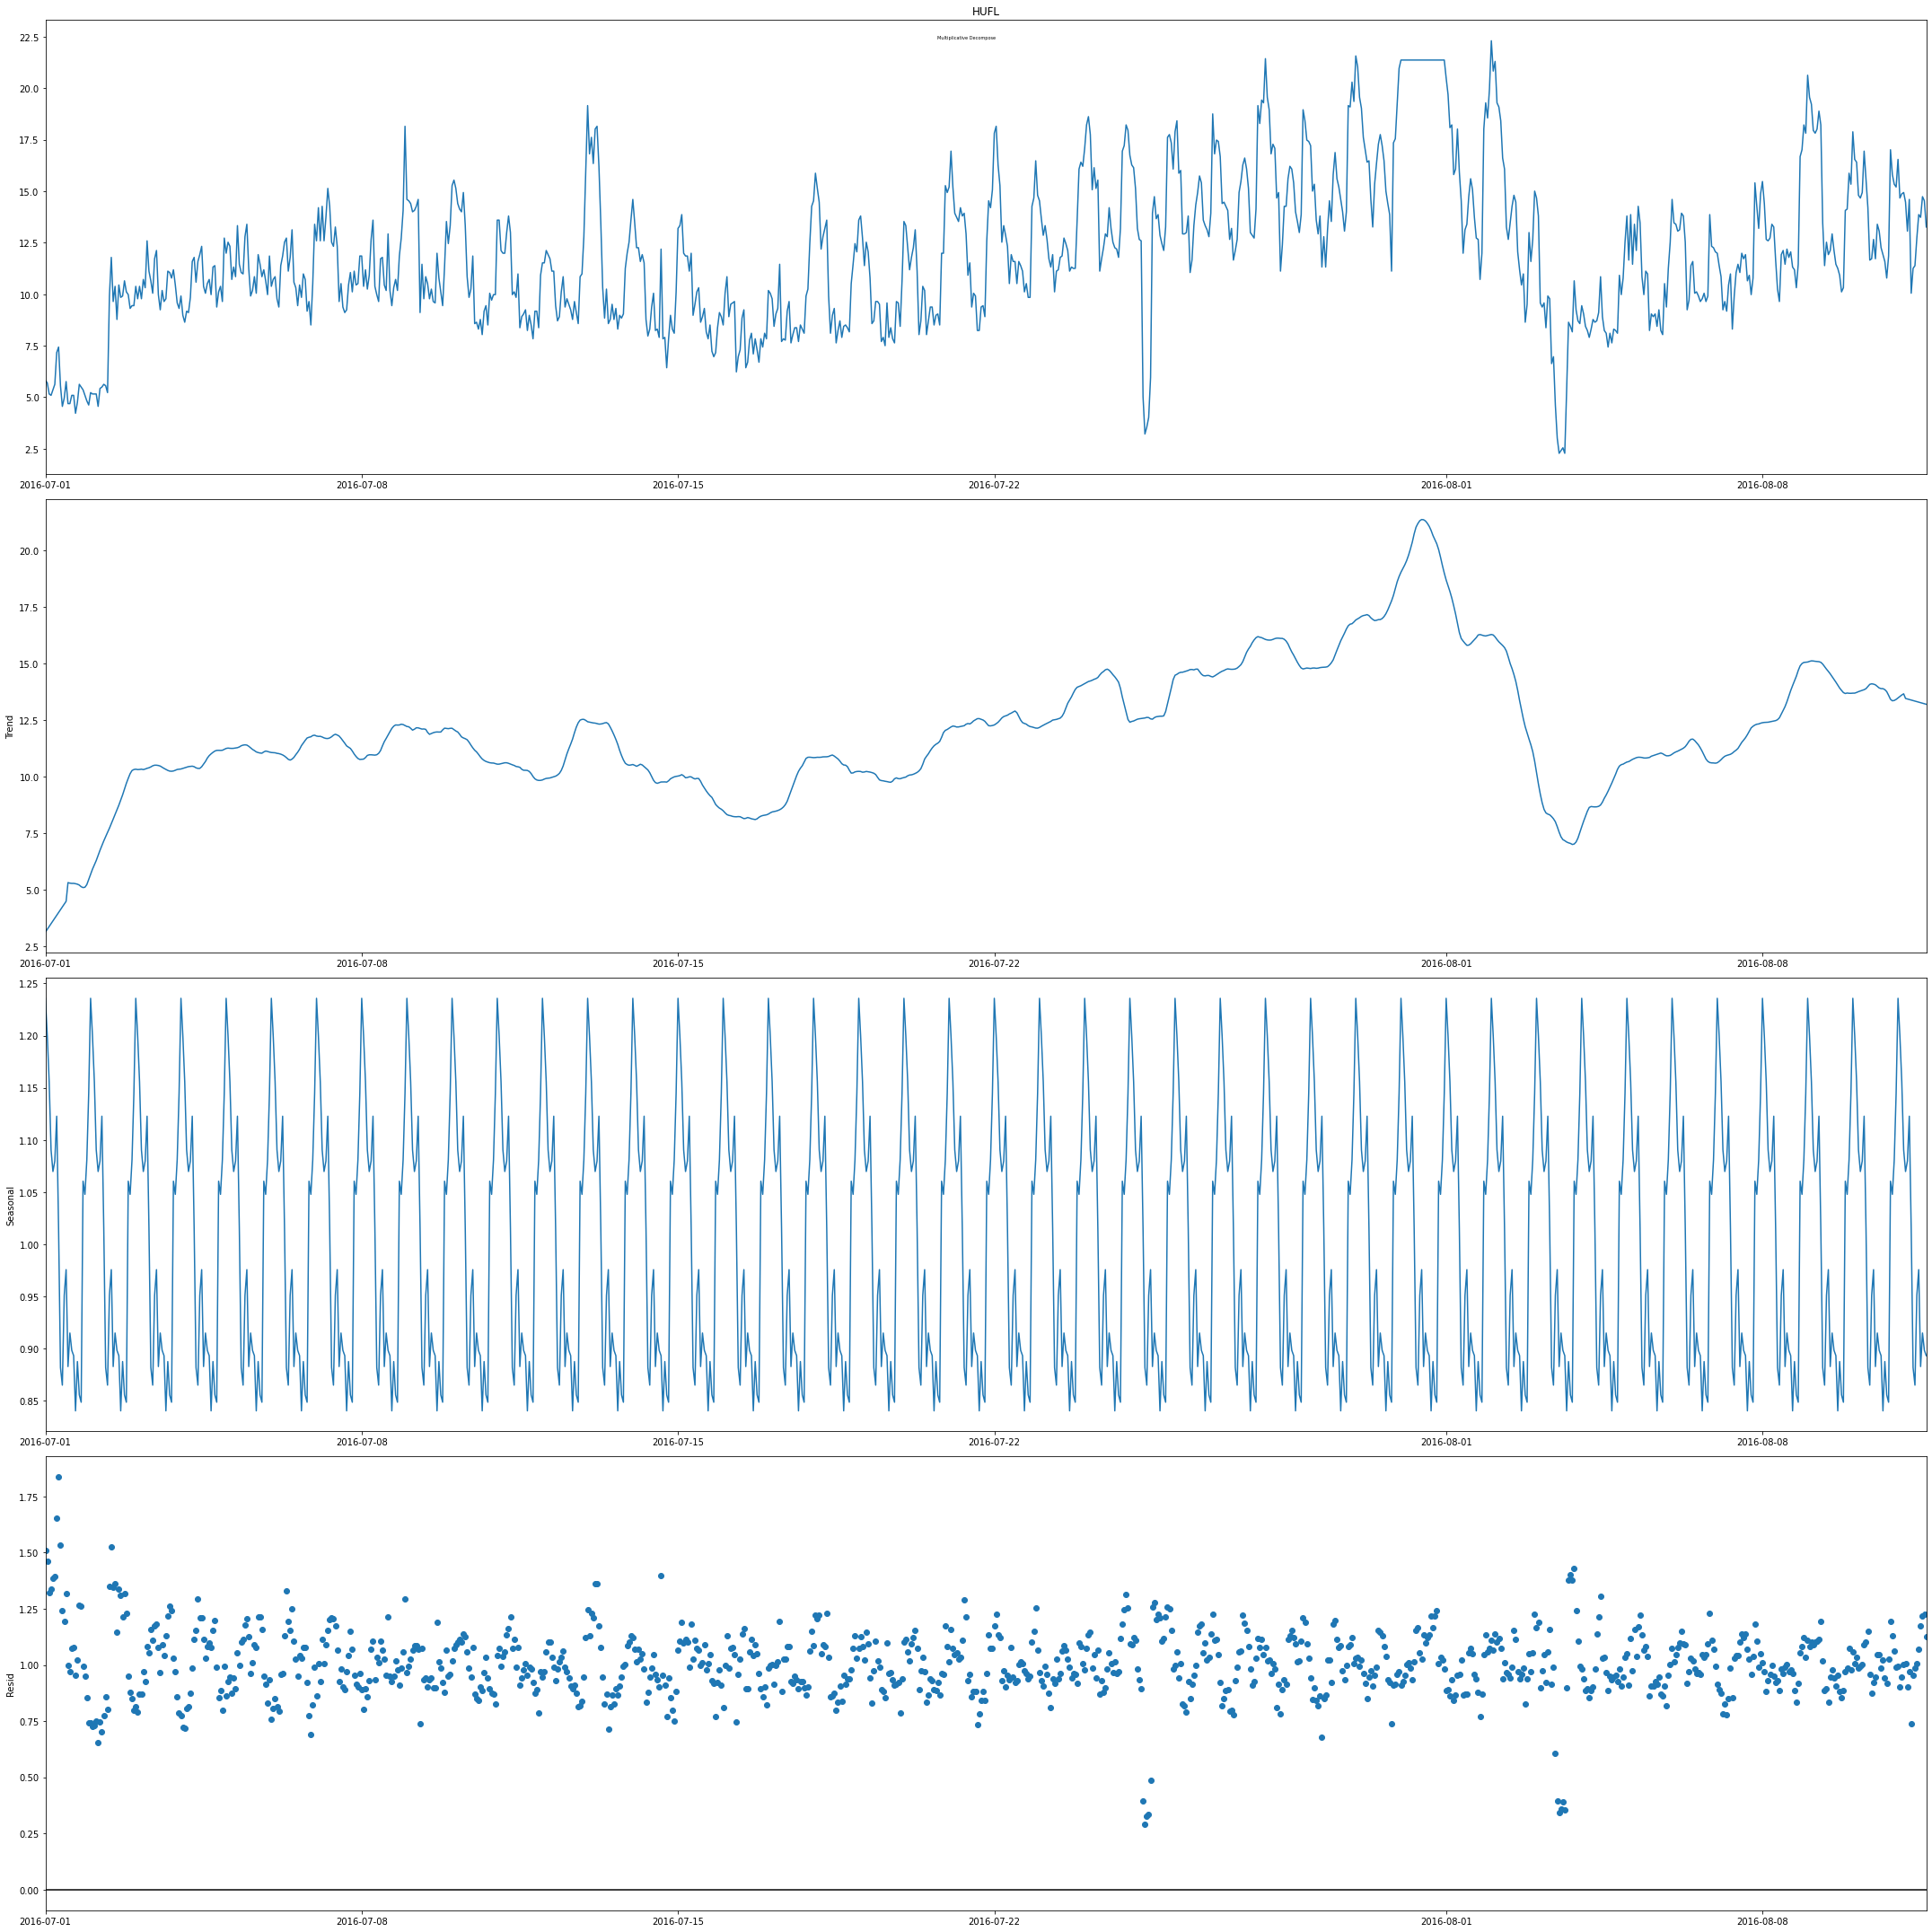

In [26]:
result_mul = seasonal_decompose(df['HUFL'], model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (30,30)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=5)
plt.savefig('result1.png')
plt.show()

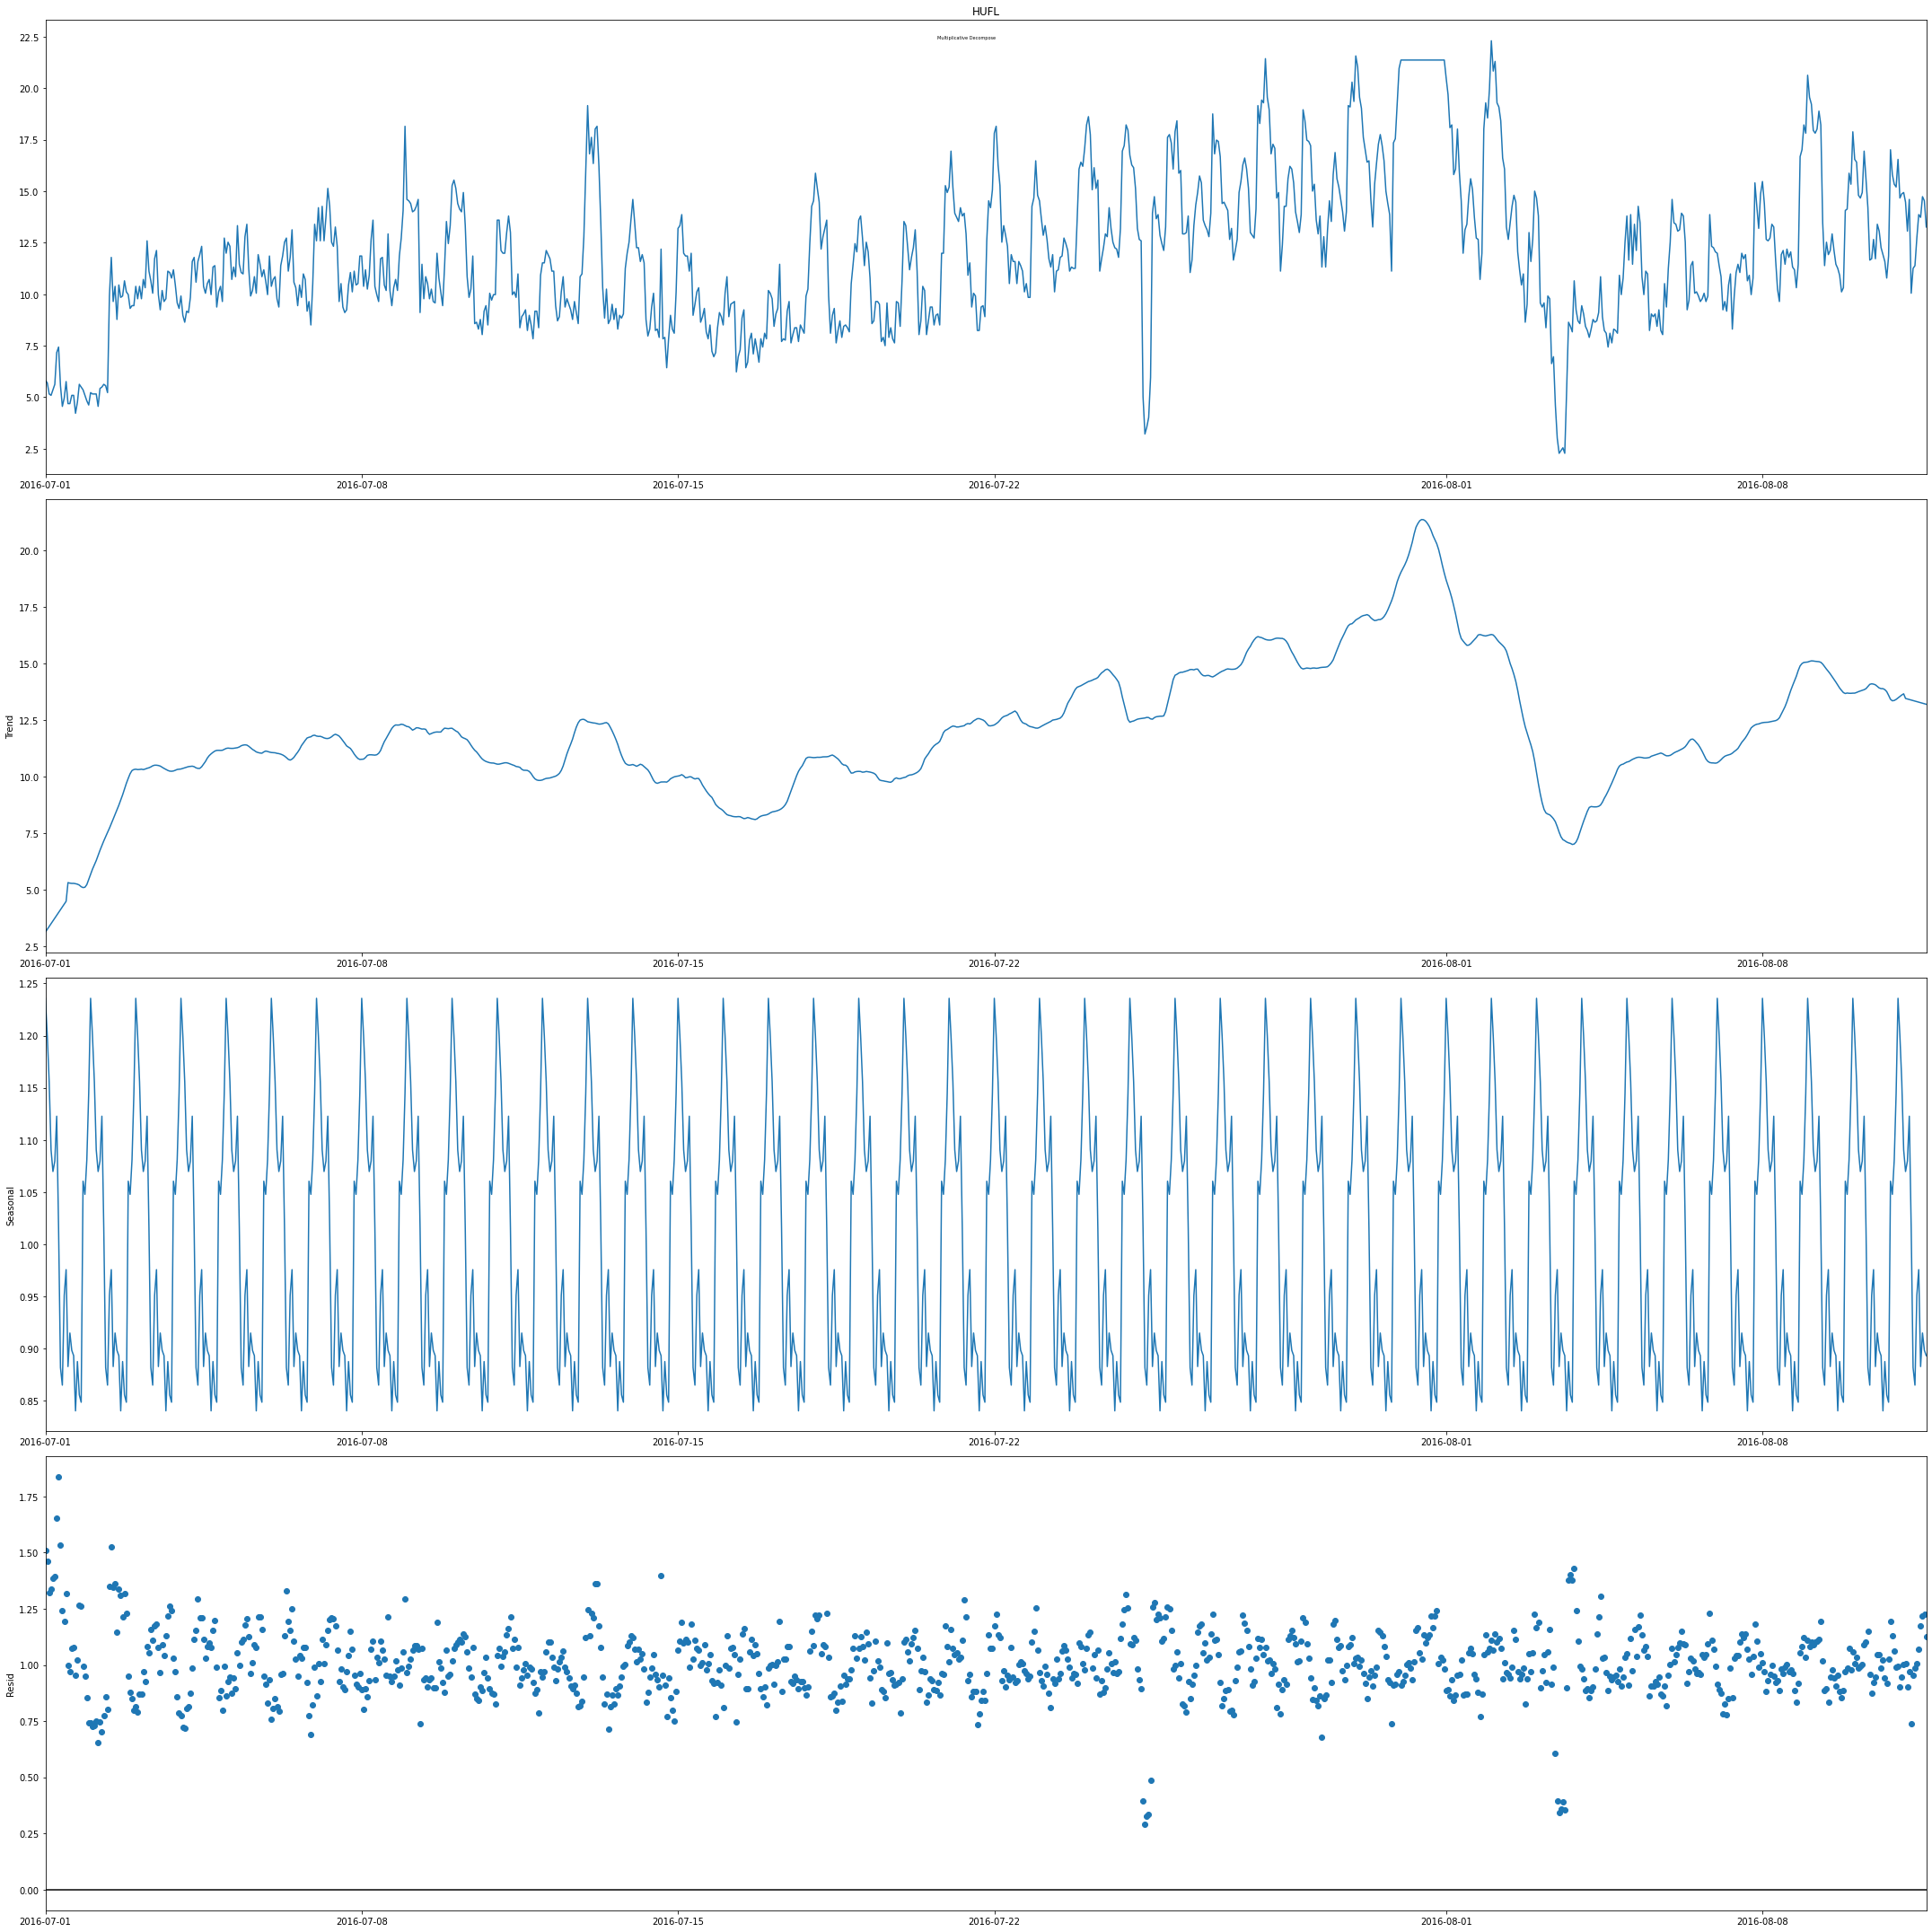

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [27]:
for col in df.columns:
    result_mul = seasonal_decompose(df[col], model='multiplicative', extrapolate_trend='freq')
    plt.rcParams.update({'figure.figsize': (30,30)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=5)
    plt.savefig('result{}.png'.format(col))
    plt.show()

In [28]:
df.columns

Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], dtype='object')

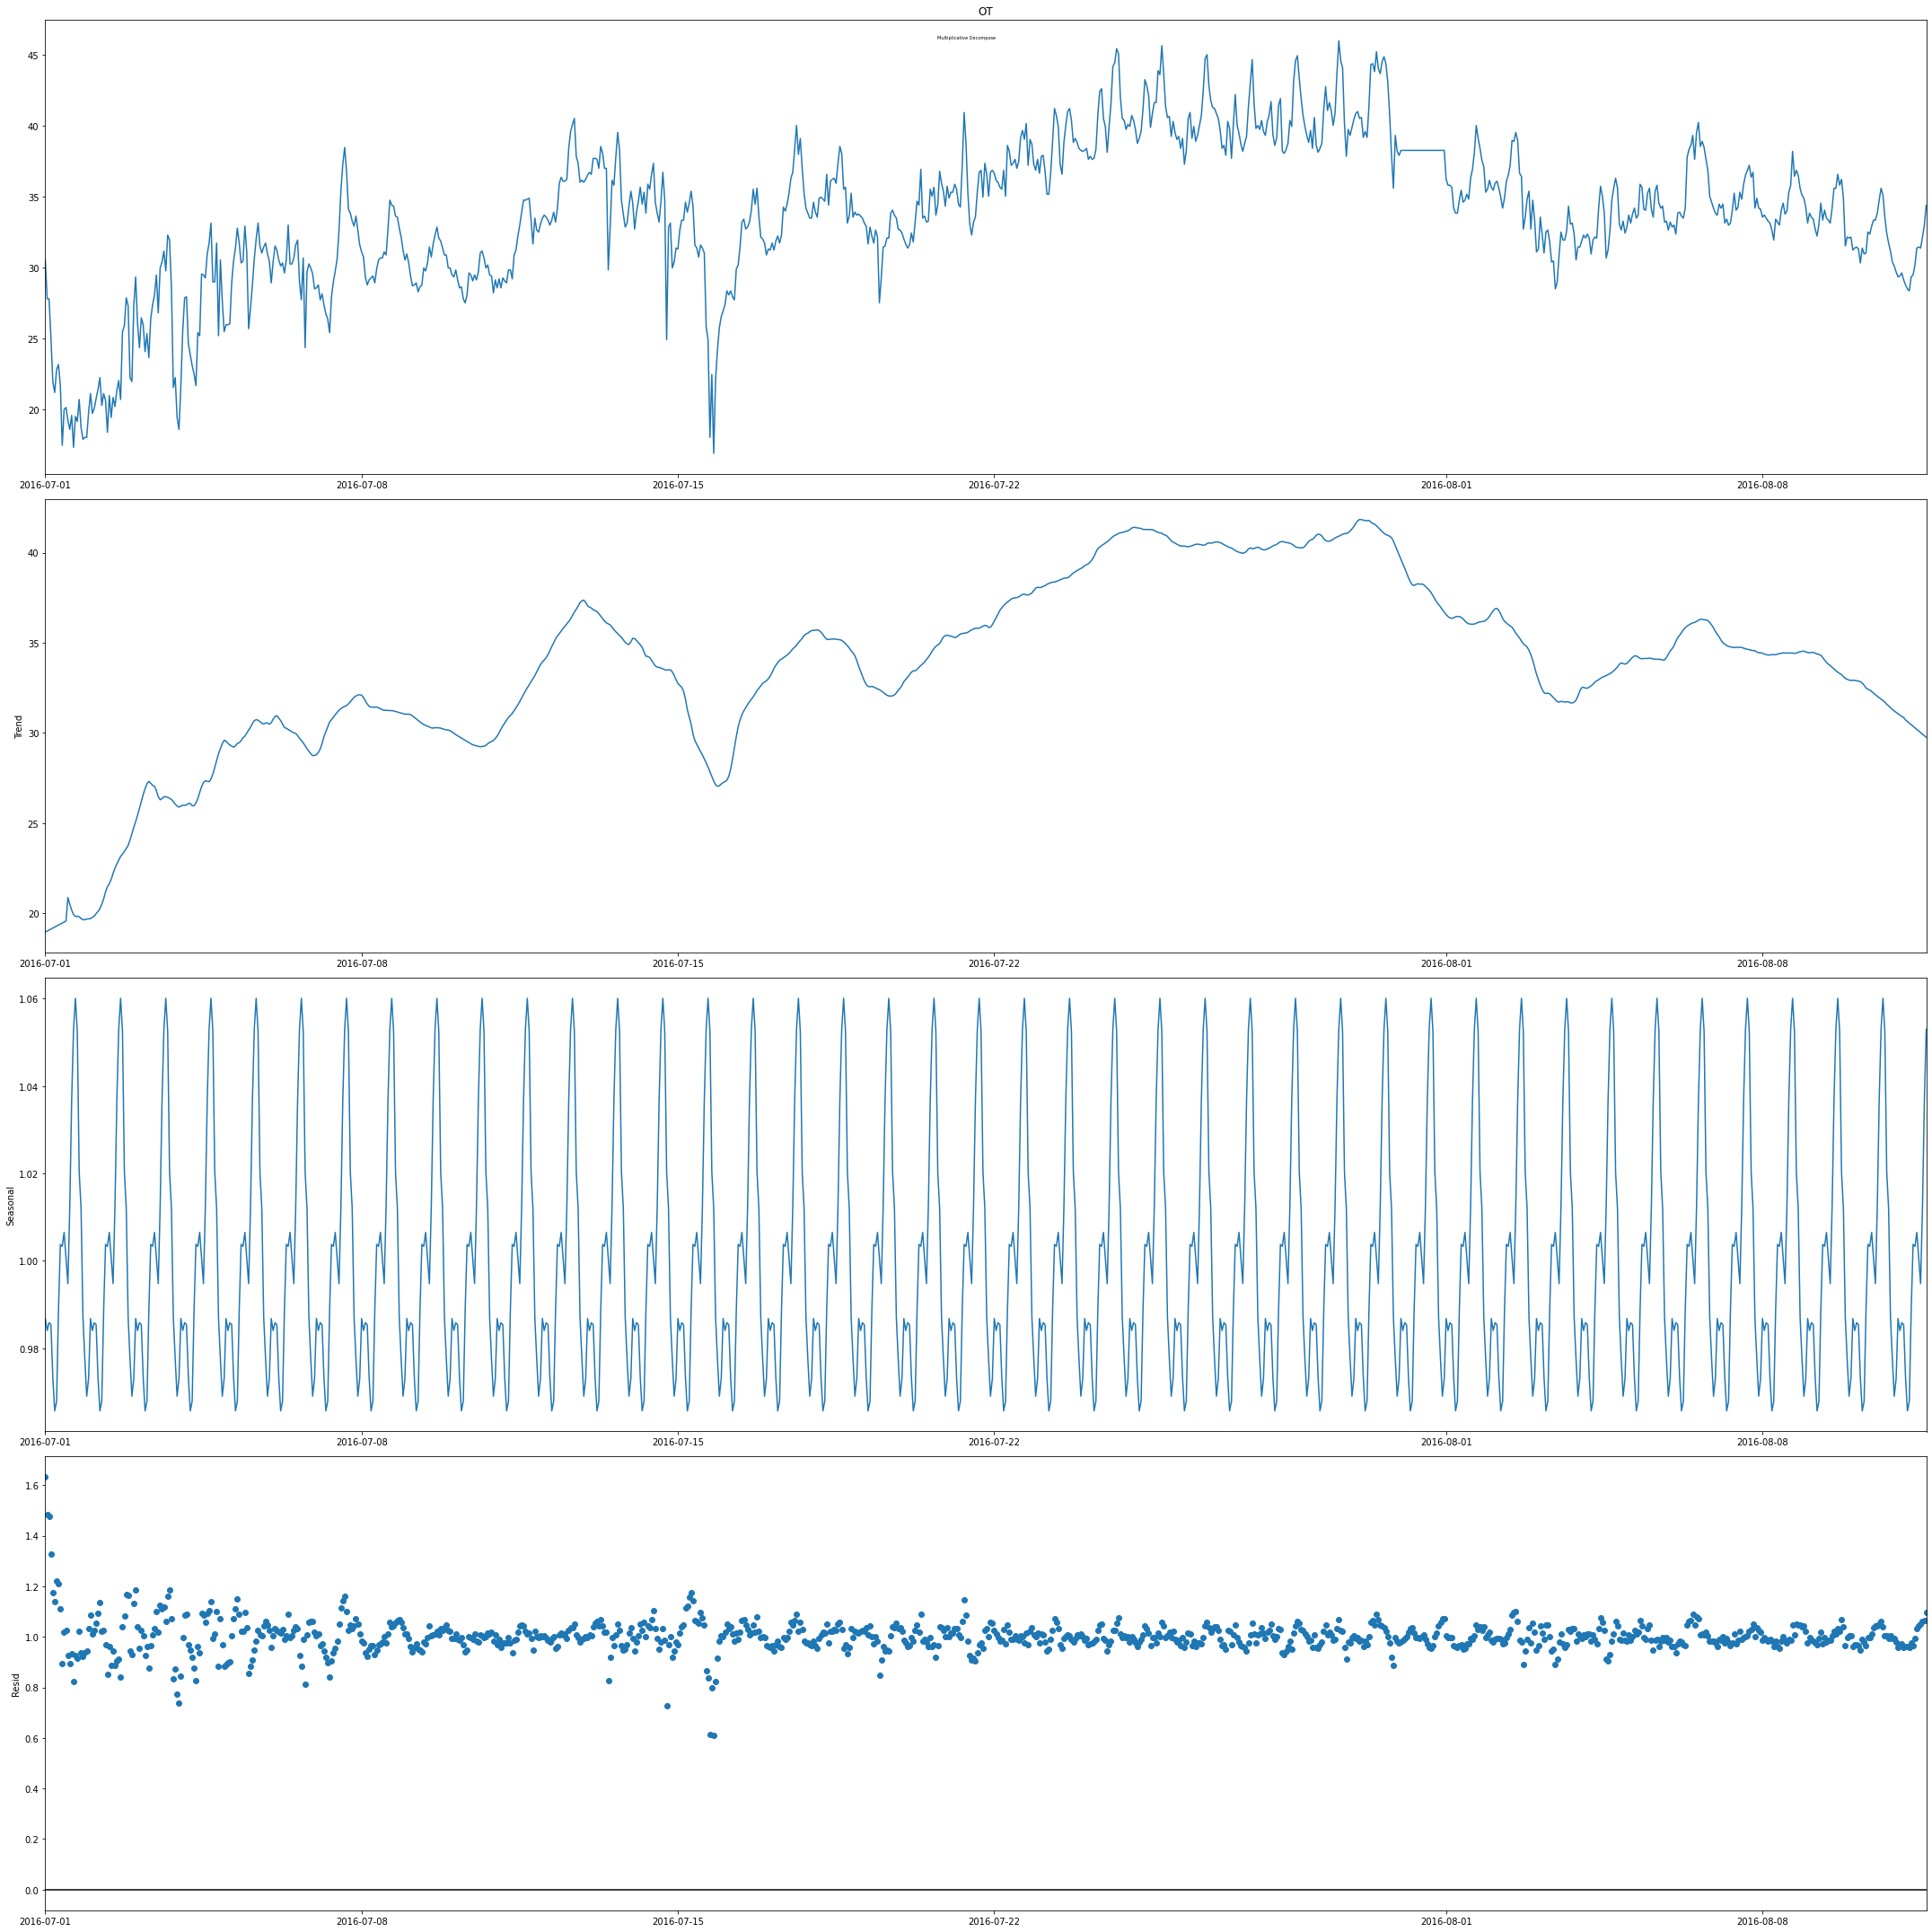

In [32]:

result_mul = seasonal_decompose(df['OT'], model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (30,30)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=5)
plt.savefig('result{}.png'.format('OT'))
plt.show()

In [37]:
result_ot = seasonal_decompose(df['OT'], model='multiplicative', extrapolate_trend='freq')
result_hufl = seasonal_decompose(df['HUFL'], model='multiplicative', extrapolate_trend='freq')
result_lufl = seasonal_decompose(df['LUFL'], model='multiplicative', extrapolate_trend='freq')
result_lull = seasonal_decompose(df['LULL'], model='multiplicative', extrapolate_trend='freq')

In [39]:
a = (result_ot.resid.values + result_hufl.resid.values + result_lufl.resid.values + result_lull.resid.values) / 4

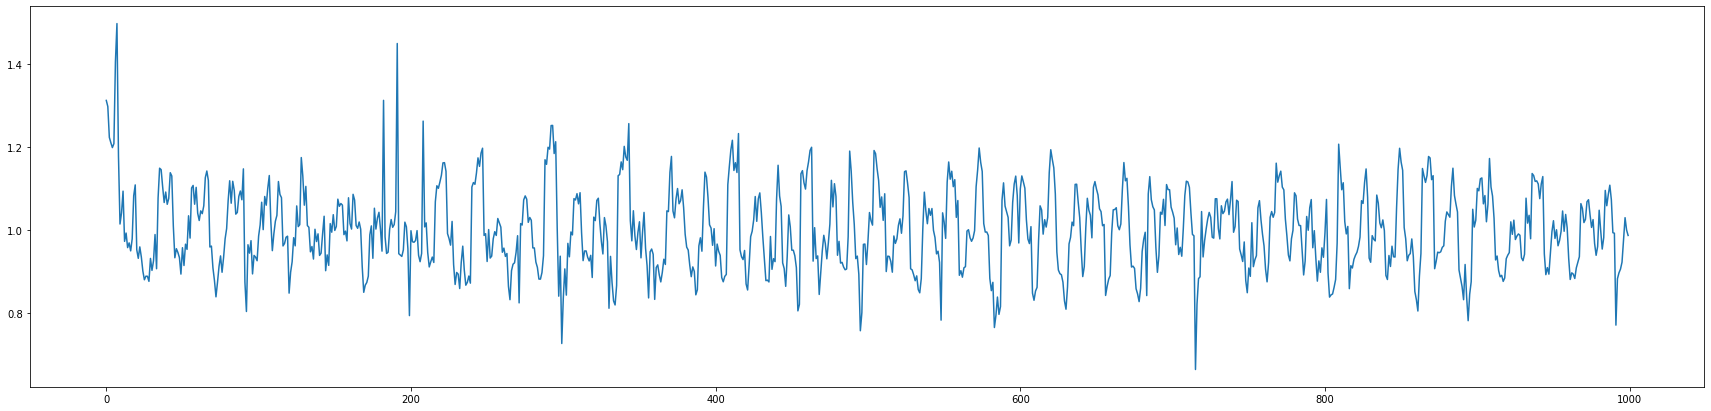

In [42]:
plt.rcParams.update({'figure.figsize': (30,7)})
plt.plot(a)
plt.savefig('avg.png')
plt.show()